In [17]:
import cv2
import numpy as np
import os
from skimage import data, io, filters
from matplotlib import pyplot as plt

In [2]:
image_path='4.jpg'

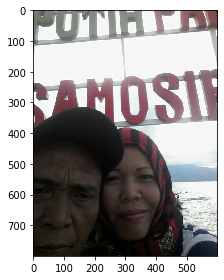

In [3]:
moon = io.imread(image_path)
io.imshow(moon)

In [4]:
image = cv2.imread(image_path)


In [5]:
image

array([[[121, 130, 127],
        [127, 136, 133],
        [131, 140, 137],
        ...,
        [ 76,  78, 118],
        [ 76,  78, 118],
        [ 74,  76, 116]],

       [[122, 131, 128],
        [126, 135, 132],
        [128, 137, 134],
        ...,
        [ 71,  73, 113],
        [ 74,  76, 116],
        [ 74,  76, 116]],

       [[129, 138, 135],
        [129, 138, 135],
        [128, 137, 134],
        ...,
        [ 63,  66, 104],
        [ 69,  72, 110],
        [ 73,  76, 114]],

       ...,

       [[ 10,  17,  20],
        [ 10,  17,  20],
        [ 11,  18,  21],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 42,  32,  22]],

       [[  9,  16,  19],
        [ 10,  17,  20],
        [ 11,  18,  21],
        ...,
        [ 44,  35,  25],
        [ 43,  34,  24],
        [ 41,  32,  22]],

       [[  8,  15,  18],
        [  9,  16,  19],
        [ 11,  18,  21],
        ...,
        [ 46,  37,  27],
        [ 45,  36,  26],
        [ 43,  34,  24]]

In [6]:
#Face Detection
class FaceDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    
    def detect(self, image, biggest_only=True):
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30, 30)
        biggest_only = True
        faces_coord = self.classifier.detectMultiScale(image,
                                                       scaleFactor=scale_factor,
                                                       minNeighbors=min_neighbors,
                                                       minSize=min_size,
                                                       flags=cv2.CASCADE_SCALE_IMAGE)
        return faces_coord

def cut_faces(image, faces_coord):
    faces = []
    
    for (x, y, w, h) in faces_coord:
        w_rm = int(0.3 * w / 2)
        faces.append(image[y: y + h, x + w_rm: x + w - w_rm])
         
    return faces

def resize(images, size=(224, 224)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image, size, 
                                    interpolation=cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, 
                                    interpolation=cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm



def normalize_faces(image, faces_coord):

    faces = cut_faces(image, faces_coord)
    faces = resize(faces)
    
    return faces
  

detector = FaceDetector("haarcascade_frontalface_default.xml")
faces_coord = detector.detect(image, True)


In [18]:
#Show Face Coordinat
faces_coord

array([[208, 466, 217, 217]], dtype=int32)

In [8]:
#Count the elements of face_coord that more than 0

#if lebih dari 4, then terdeteksi wajah lebih
print(np.count_nonzero(faces_coord >0))

4


In [21]:
#Show cutted image
crop_img = image[466:466+217, 208:208+217]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

-1

## JSON

In [24]:
import json

obj = {
    'faceCoordinates': faces_coord.tolist()
}
print(json.dumps(obj, indent=2))

{
  "faceCoordinates": [
    [
      208,
      466,
      217,
      217
    ]
  ]
}


## Cartoon

In [ ]:
def detectCartoon1(imagePath):
    img_before = cv2.imread(imagePath)
    img_after = 0    

    gray = cv2.GaussianBlur(img_before, (3, 3), 0, 0, cv2.BORDER_DEFAULT)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    img_after = cv2.Laplacian(gray, cv2.CV_64F)
    img_after = cv2.convertScaleAbs(img_after)

    return np.mean(img_after)    

def detectCartoon2(imagePath):
    img_before = cv2.imread(imagePath)
    img_after = 0

    for i in range(1, 31, 2):
        img_after = cv2.bilateralFilter(img_before, i, i*2, i/2)

    img_after = cv2.cvtColor(img_after, cv2.COLOR_HSV2BGR_FULL)
    img_before = cv2.cvtColor(img_before, cv2.COLOR_HSV2BGR_FULL)

    return np.mean(img_before - img_after)

dc1 = detectCartoon1(image_path)
dc2 = detectCartoon2(image_path)
print('Img: ' + image_path + ' detectCartoon1: ' + str(dc1) + ' detectCartoon2: ' + str(dc2))